# **LABORATORIO 4**

## Universitario: Aly Delgado Danner Abel    

**CU: 35 - 5281  Ing. de Sistemas**
                        **CU: 104 - 794  Ing. en Diseño y Animación Digital**

Link del Dataset: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

Realizaremos el analisis de el dataset Intel Image Classification. Para probar la efectividad de un modelo de Regresión logística multiclase en conjuntos de imagenes un poco sofisticadas de 150 x 150.

Se vectorizara cada una de las imagenes guardando todos los datos en archivos .mat
Uno para **Train** y otro para **Test** . A continuación los tipos de clase a los que pueden corresponder cada una de las fotografias:

**Valores para Y ->**

0.   Buildings
1.   forest
2.   glacier
3.   mountain
4.   sea
5.   street





---
## 1.   Importación del **Dataset**







In [1]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# modulo para guardar archivos en formato MATLAB
from scipy.io import savemat

# División de los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# Manipulación y análisis de datos
import pandas as pd

# Librería para procesamiento de imágenes
import cv2

#Libreria para leer y escribir datos en varios formatos
import scipy.io

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---
## 2.   Conversion de carpetas de imagenes a formato . mat




**Nuestro Dataset consta de imagenes (150px x 150px) de 6 categorias, por lo que llevaremos estos datos a un archivo .mat y asi poder tratarlos de mejor manera**

In [2]:
# Ruta a la carpeta principal del dataset
dataset_folder = r'/content/drive/MyDrive/datasets/lab4/intel/seg_train/seg_train'

# Inicializar listas para almacenar las imágenes y etiquetas
images = []
labels = []

# Definir las clases y asignarles un índice
clases = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
clase_indices = {clase: idx for idx, clase in enumerate(clases)}

# Iterar sobre cada clase
for clase in clases:
    clase_folder = os.path.join(dataset_folder, clase)
    label = clase_indices[clase]

    # Iterar sobre cada imagen en la carpeta de la clase
    for image_name in os.listdir(clase_folder):
        image_path = os.path.join(clase_folder, image_name)

        # Leer la imagen usando OpenCV
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
        if image is not None:
            # Redimensionar la imagen a 150x150 píxeles
            image = cv2.resize(image, (64, 64))
            images.append(image)
            labels.append(label)

# Convertir las listas a arrays de numpy
images = np.array(images)
labels = np.array(labels)

save_path = '/content/drive/MyDrive/datasets/lab4/intel/intelPARCIAL1_64.mat'
savemat(save_path, {'images': images, 'labels': labels})
# Guardar el dataset procesado en un archivo .mat (compatible con MATLAB y Python)

## 3. **ENUNCIADO 1**
Guardamos nuestro .mat en un DataFrame de Pandas para asi por mostrar las filas que adicionaremos

In [3]:
mat = scipy.io.loadmat('/content/drive/MyDrive/datasets/lab4/intel/intelPARCIAL1_64.mat')

# Supongamos que las variables en el .mat son 'X' (imágenes) y 'y' (etiquetas)
X = mat['images']  # Datos de las imágenes (array de NumPy)
y = mat['labels']  # Etiquetas (array de NumPy)


# Aplanar las imágenes de 150x150 a 22500
X_aplanado = X.reshape(X.shape[0], -1)

# Convertir a DataFrame
df = pd.DataFrame(X_aplanado)
df['label'] = y.T

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,86,86,86,88,88,87,88,87,88,87,...,232,225,218,145,172,161,130,146,167,0
1,182,182,182,182,182,184,184,84,140,93,...,71,37,142,32,7,193,189,190,188,0
2,74,88,96,98,7,8,9,24,9,5,...,119,127,109,100,85,86,86,88,89,0
3,228,229,227,228,227,227,226,217,220,225,...,213,74,76,152,223,185,211,209,210,0
4,7,7,7,5,5,4,3,3,1,2,...,149,92,100,54,35,35,113,65,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14029,89,98,109,40,122,235,234,235,236,237,...,126,122,124,121,125,125,125,125,122,5
14030,95,84,75,61,60,67,68,75,41,217,...,82,99,103,135,138,129,127,84,63,5
14031,78,69,41,30,36,47,63,77,173,188,...,78,70,87,133,128,118,115,113,110,5
14032,40,40,49,60,85,71,98,58,36,109,...,31,32,37,32,37,33,31,32,32,5


In [5]:
df.shape

(14034, 4097)

Añadiremos las columnas

In [6]:
df_with_columns = df.copy()

df_with_columns['Codigo de Foto'] = df_with_columns['label'].map({0: 'B', 1: 'F', 2: 'G', 3: 'M', 4: 'S', 5: 'T'})  # 'B' = Buildings, 'F' = Forest, etc.
df_with_columns['Tipe image'] = df_with_columns['label'].map({0: 'Building image', 1: 'Forest image', 2: 'Glacier image', 3: 'Mountain image', 4: 'Sea image', 5: 'Street image'})
df_with_columns['Natural (si = 1 , no = 0)'] = df_with_columns['label'].map({0: False, 1: True, 2: True, 3: True, 4: True, 5: False})  # Natural True para Forest, Glacier, Sea

# Mover las nuevas columnas antes de 'label'
column_order = df_with_columns.columns.tolist()
column_order.remove('label')
df_with_columns = df_with_columns[column_order + ['label']]

# Mostrar las primeras filas
df_with_columns

,0,1,2,3,4,5,6,7,8,9,...,4090,4091,4092,4093,4094,4095,Codigo de Foto,Tipe image,"Natural (si = 1 , no = 0)",label
0,86,86,86,88,88,87,88,87,88,87,...,145,172,161,130,146,167,B,Building image,False,0
1,182,182,182,182,182,184,184,84,140,93,...,32,7,193,189,190,188,B,Building image,False,0
2,74,88,96,98,7,8,9,24,9,5,...,100,85,86,86,88,89,B,Building image,False,0
3,228,229,227,228,227,227,226,217,220,225,...,152,223,185,211,209,210,B,Building image,False,0
4,7,7,7,5,5,4,3,3,1,2,...,54,35,35,113,65,38,B,Building image,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14029,89,98,109,40,122,235,234,235,236,237,...,121,125,125,125,125,122,T,Street image,False,5
14030,95,84,75,61,60,67,68,75,41,217,...,135,138,129,127,84,63,T,Street image,False,5
14031,78,69,41,30,36,47,63,77,173,188,...,133,128,118,115,113,110,T,Street image,False,5
14032,40,40,49,60,85,71,98,58,36,109,...,32,37,33,31,32,32,T,Street image,False,5


## 4. **ENUNCIADO 2**
Duplicamos las filas del dataset con la generación de ejemplos basados en del mismo DataFrame

In [7]:
import os
import cv2
import numpy as np
from scipy.io import savemat

# Ruta a la carpeta principal del dataset
dataset_folder = r'/content/drive/MyDrive/datasets/lab4/intel/seg_train/seg_train'

# Inicializar listas para almacenar las imágenes y etiquetas
images = []  # Lista para almacenar las imágenes procesadas
labels = []  # Lista para almacenar las etiquetas correspondientes a las imágenes

# Definir las clases y asignarles un índice numérico
clases = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
clase_indices = {clase: idx for idx, clase in enumerate(clases)}  # Mapeo de clases a índices numéricos

# Ángulo inicial de rotación (alternando 20 grados y -20 grados)
angle = 20  # Se comienza rotando 20 grados y luego se alterna con -20 grados

# Función para hacer zoom en la imagen
def zoom_image(image, zoom_factor=1.2):
    """
    Aplica un zoom a la imagen y luego recorta el centro para volver al tamaño original.
    :param image: Imagen en escala de grises
    :param zoom_factor: Factor de zoom, 1.2 significa aumentar un 20% el tamaño original
    :return: Imagen con zoom aplicada y recortada a 150x150 píxeles
    """
    height, width = image.shape[:2]  # Obtener las dimensiones originales de la imagen
    # Redimensionar la imagen usando el factor de zoom (fx y fy determinan cuánto agrandar)
    zoomed_image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)

    # Obtener el centro de la imagen con zoom para recortar
    center_x, center_y = zoomed_image.shape[1] // 2, zoomed_image.shape[0] // 2
    # Recortar la imagen con zoom para que tenga de nuevo 150x150 píxeles
    cropped_image = zoomed_image[center_y - height // 2:center_y + height // 2,
                                 center_x - width // 2:center_x + width // 2]
    return cropped_image  # Devolver la imagen con zoom y recortada

# Iterar sobre cada clase
for clase in clases:
    clase_folder = os.path.join(dataset_folder, clase)  # Ruta completa de la carpeta de la clase actual
    label = clase_indices[clase]  # Obtener el índice numérico correspondiente a la clase

    # Iterar sobre cada imagen en la carpeta de la clase
    for image_name in os.listdir(clase_folder):  # Listar todos los archivos en la carpeta de la clase
        image_path = os.path.join(clase_folder, image_name)  # Ruta completa de la imagen actual

        # Leer la imagen usando OpenCV
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Leer la imagen en escala de grises
        if image is not None:  # Verificar que la imagen se haya leído correctamente
            # Redimensionar la imagen a 150x150 píxeles
            image = cv2.resize(image, (64, 64))  # Cambiar el tamaño de la imagen a 150x150

            # Obtener el centro de la imagen para la rotación
            center = (image.shape[1] // 2, image.shape[0] // 2)  # El centro es necesario para rotar correctamente

            # Obtener la matriz de rotación, que define cómo rotar la imagen
            rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)  # Rotar en el centro, sin cambiar la escala

            # Aplicar la rotación a la imagen
            rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
            # cv2.warpAffine aplica la rotación a la imagen basándose en la matriz de rotación

            # Aplicar zoom a la imagen rotada para eliminar las esquinas vacías
            zoomed_image = zoom_image(rotated_image, zoom_factor=1.2)  # Aplicar un zoom de 20% a la imagen rotada

            # Guardar la imagen procesada (rotada y con zoom) en la lista de imágenes
            images.append(zoomed_image)  # Añadir la imagen procesada a la lista
            labels.append(label)  # Añadir la etiqueta correspondiente a la imagen

            # Alternar entre 20 y -20 grados para la siguiente imagen
            angle = -angle  # Cambiar el ángulo de rotación para la próxima imagen

# Convertir las listas de imágenes y etiquetas a arrays de numpy
images = np.array(images)  # Convertir la lista de imágenes a un array de numpy
labels = np.array(labels)  # Convertir la lista de etiquetas a un array de numpy

# Guardar el archivo .mat en Google Drive en una carpeta específica
save_path = '/content/drive/MyDrive/datasets/lab4/intel/intelPARCIAL1_SINTETICO_64.mat'
savemat(save_path, {'images': images, 'labels': labels})
# Guardar el dataset procesado en un archivo .mat (compatible con MATLAB y Python)


Leemos y guardamos el dataset en variables x y y sinteticas

In [13]:
mat = scipy.io.loadmat('/content/drive/MyDrive/datasets/lab4/intel/intelPARCIAL1_SINTETICO_64.mat')

# Supongamos que las variables en el .mat son 'X' (imágenes) y 'y' (etiquetas)
X_sintetica = mat['images']  # Datos de las imágenes (array de NumPy)
y_sintetica = mat['labels']  # Etiquetas (array de NumPy)


# Aplanar las imágenes de 150x150 a 22500
X_aplanado_sin = X_sintetica.reshape(X_sintetica.shape[0], -1)

# Convertir a DataFrame
df_sintetico = pd.DataFrame(X_aplanado_sin)
df_sintetico['label'] = y_sintetica.T

## 5. **ENUNCIADO 3**
Graficas de comparacion para ver si los datos son Congruentes

Funcion para graficar las imagenes

In [14]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='C'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

Gráfica de los datos de Data set original

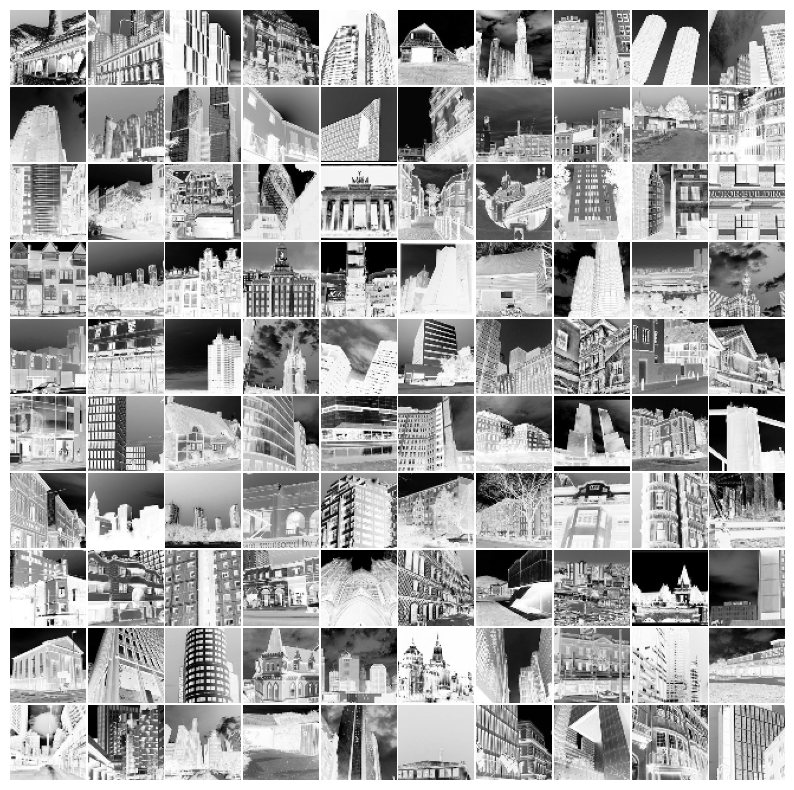

In [15]:
m = X.shape[0]
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices =  np.arange(10)

sel = X[:100, :].reshape(100,-1) # Cambiar la forma de sel para que sea bidimensional

displayData(sel)

Gráfica de los datos de Data set Sintetico

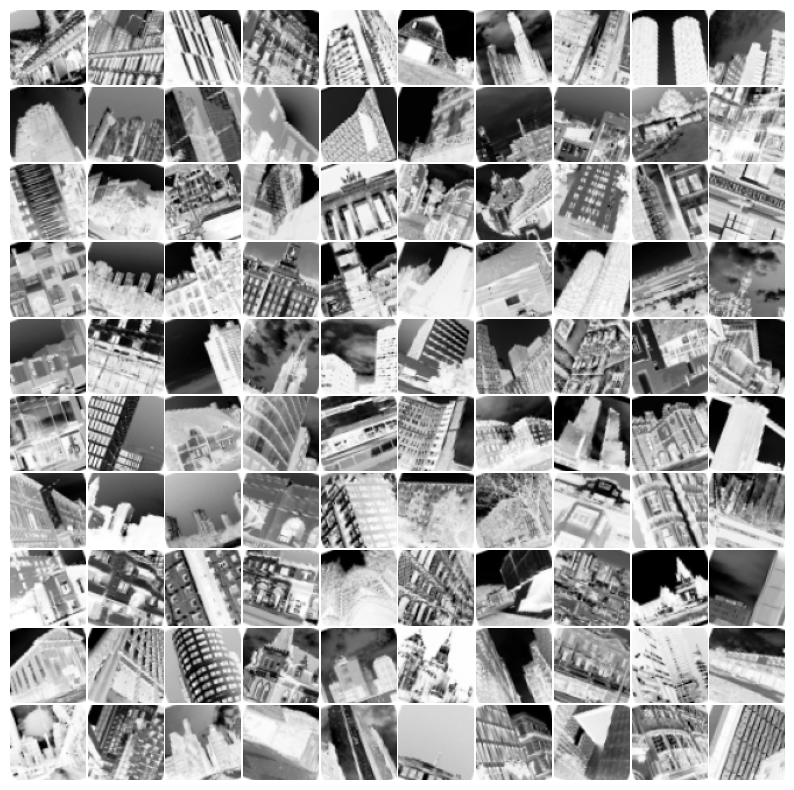

In [11]:
m_sintetica = X_sintetica.shape[0]
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.arange(10)
sel = X_sintetica[:100, :].reshape(100,-1) # Cambiar la forma de sel para que sea bidimensional

displayData(sel)

## 6. Uniendo el dataset sintetico con el original

Aqui lo convertimos de .mat a df para poder observar el dataset de mejor manera

In [16]:
mat = scipy.io.loadmat('/content/drive/MyDrive/datasets/lab4/intel/intelPARCIAL1_SINTETICO_64.mat')

# Supongamos que las variables en el .mat son 'X' (imágenes) y 'y' (etiquetas)
X_sintetica = mat['images']  # Datos de las imágenes (array de NumPy)
y_sintetica = mat['labels']  # Etiquetas (array de NumPy)


# Aplanar las imágenes de 150x150 a 22500
X_aplanado_sin = X_sintetica.reshape(X_sintetica.shape[0], -1)

# Convertir a DataFrame
df_sintetico = pd.DataFrame(X_aplanado_sin)
df_sintetico['label'] = y_sintetica.T

In [21]:
df_sintetico

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,0,0,0,0,0,1,7,29,52,72,...,244,227,197,163,138,94,56,19,0,0
1,0,0,10,48,103,131,132,132,117,112,...,114,142,164,180,189,172,92,28,0,0
2,0,0,0,0,0,1,9,51,67,45,...,2,2,2,5,15,43,28,9,0,0
3,0,0,12,49,95,122,186,143,102,80,...,193,213,213,195,170,147,116,44,0,0
4,0,0,0,0,0,0,0,1,3,6,...,149,151,108,52,15,7,5,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14029,0,0,28,105,186,187,169,209,225,227,...,79,67,54,45,35,36,35,14,0,5
14030,0,0,0,0,0,2,18,70,129,183,...,97,99,96,75,56,50,28,9,0,5
14031,0,0,26,97,184,215,210,225,231,197,...,81,95,112,124,132,130,104,40,0,5
14032,0,0,0,0,0,0,5,21,39,55,...,59,47,30,17,13,5,6,2,0,5


Preparamos el Dataset Sintetico para poder unir al original, añadiendole las

variables:

*   CARACTER
*   TEXTO
*   BOOLEANO





In [22]:
df_with_columns_sin = df.copy()

df_with_columns_sin['Codigo de Foto'] = df_with_columns_sin['label'].map({0: 'B', 1: 'F', 2: 'G', 3: 'M', 4: 'S', 5: 'T'})  # 'B' = Buildings, 'F' = Forest, etc.
df_with_columns_sin['Tipe image'] = df_with_columns_sin['label'].map({0: 'Building image', 1: 'Forest image', 2: 'Glacier image', 3: 'Mountain image', 4: 'Sea image', 5: 'Street image'})
df_with_columns_sin['Natural (si = 1 , no = 0)'] = df_with_columns_sin['label'].map({0: False, 1: True, 2: True, 3: True, 4: True, 5: False})  # Natural True para Forest, Glacier, Sea

# Mover las nuevas columnas antes de 'label'
column_order = df_with_columns_sin.columns.tolist()
column_order.remove('label')
df_with_columns_sin = df_with_columns_sin[column_order + ['label']]

# Mostrar las primeras filas
df_with_columns_sin

,0,1,2,3,4,5,6,7,8,9,...,4090,4091,4092,4093,4094,4095,Codigo de Foto,Tipe image,"Natural (si = 1 , no = 0)",label
0,86,86,86,88,88,87,88,87,88,87,...,145,172,161,130,146,167,B,Building image,False,0
1,182,182,182,182,182,184,184,84,140,93,...,32,7,193,189,190,188,B,Building image,False,0
2,74,88,96,98,7,8,9,24,9,5,...,100,85,86,86,88,89,B,Building image,False,0
3,228,229,227,228,227,227,226,217,220,225,...,152,223,185,211,209,210,B,Building image,False,0
4,7,7,7,5,5,4,3,3,1,2,...,54,35,35,113,65,38,B,Building image,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14029,89,98,109,40,122,235,234,235,236,237,...,121,125,125,125,125,122,T,Street image,False,5
14030,95,84,75,61,60,67,68,75,41,217,...,135,138,129,127,84,63,T,Street image,False,5
14031,78,69,41,30,36,47,63,77,173,188,...,133,128,118,115,113,110,T,Street image,False,5
14032,40,40,49,60,85,71,98,58,36,109,...,32,37,33,31,32,32,T,Street image,False,5


Unimos ambos data frames (Original y Sintético)

In [23]:
# Combinar los DataFrames
df_combined = pd.concat([df_with_columns, df_with_columns_sin], ignore_index=True)
df_combined.shape

(28068, 4100)

In [24]:
df_combined

,0,1,2,3,4,5,6,7,8,9,...,4090,4091,4092,4093,4094,4095,Codigo de Foto,Tipe image,"Natural (si = 1 , no = 0)",label
0,86,86,86,88,88,87,88,87,88,87,...,145,172,161,130,146,167,B,Building image,False,0
1,182,182,182,182,182,184,184,84,140,93,...,32,7,193,189,190,188,B,Building image,False,0
2,74,88,96,98,7,8,9,24,9,5,...,100,85,86,86,88,89,B,Building image,False,0
3,228,229,227,228,227,227,226,217,220,225,...,152,223,185,211,209,210,B,Building image,False,0
4,7,7,7,5,5,4,3,3,1,2,...,54,35,35,113,65,38,B,Building image,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,89,98,109,40,122,235,234,235,236,237,...,121,125,125,125,125,122,T,Street image,False,5
28064,95,84,75,61,60,67,68,75,41,217,...,135,138,129,127,84,63,T,Street image,False,5
28065,78,69,41,30,36,47,63,77,173,188,...,133,128,118,115,113,110,T,Street image,False,5
28066,40,40,49,60,85,71,98,58,36,109,...,32,37,33,31,32,32,T,Street image,False,5


Observando las dimensiones podemos verificar que ambos datasets si se unieron



---


Ahora Convertimos los datos literales en numerales para poder trabajar con ellos:

In [25]:
# Convertir 'Codigo de Foto' a números únicos
# 'astype('category')' convierte la columna a un tipo categórico,
# y 'cat.codes' convierte las categorías a códigos numéricos únicos.
df_combined['Codigo de Foto'] = df_combined['Codigo de Foto'].astype('category').cat.codes

# Convertir 'Type image' a números (Label Encoding)
# Similar al paso anterior, 'astype('category')' convierte la columna a un tipo categórico,
# y 'cat.codes' convierte las categorías a códigos numéricos únicos.
df_combined['Tipe image'] = df_combined['Tipe image'].astype('category').cat.codes

# Convertir 'Natural' False a 0 y True a 1
# 'apply(lambda x: 1 if x else 0)' aplica una función lambda a cada valor en la columna,
# donde la función lambda convierte True a 1 y False a 0.
df_combined['Natural (si = 1 , no = 0)'] = df_combined['Natural (si = 1 , no = 0)'].apply(lambda x: 1 if x else 0)


#Esto es para mostrar las columnas del medio para poder verificar
num_rows = len(df_combined)
start_row = num_rows // 4
end_row = 3 * (num_rows // 4)
examples_middle = df_combined.iloc[start_row:end_row]
examples_middle

,0,1,2,3,4,5,6,7,8,9,...,4090,4091,4092,4093,4094,4095,Codigo de Foto,Tipe image,"Natural (si = 1 , no = 0)",label
7017,0,0,0,1,0,0,0,1,0,0,...,0,2,0,2,0,1,3,3,1,3
7018,112,113,115,117,117,119,120,121,121,121,...,120,117,123,115,104,101,3,3,1,3
7019,255,255,255,255,255,255,255,255,255,255,...,35,88,78,65,46,44,3,3,1,3
7020,125,128,127,126,127,127,126,124,125,124,...,216,236,232,220,225,232,3,3,1,3
7021,144,138,140,140,140,141,140,140,142,143,...,17,14,9,17,16,21,3,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21046,169,169,170,169,169,170,170,169,169,171,...,122,117,122,142,146,157,3,3,1,3
21047,144,146,150,149,144,142,143,142,146,148,...,4,1,2,0,5,2,3,3,1,3
21048,121,121,121,121,119,119,121,124,132,126,...,24,5,12,10,7,20,3,3,1,3
21049,89,89,89,90,90,90,89,90,90,90,...,100,98,99,95,99,97,3,3,1,3


## 7. **ENUNCIADO 4**
Dividiendo los datos del dataset combinado en datos de entrenamiento y prueba


In [49]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(df_combined, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba
X_test = test_data.iloc[:, :4099]
y_test = test_data.iloc[:, 4099:4100]

# Dividimos los datos para X_train y y_train para el entremamiento
X_train = train_data.iloc[:, :4099]
y_train = train_data.iloc[:, 4099:4100]

m = y_train.size


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el test son: {:.0f}".format(len(test_data)))


Datos de X_train:
         0    1    2    3    4    5    6    7    8    9  ...  4089  4090  \
8460   108  130  141  133  147  157  168  166  165  164  ...    25    17   
25268   96  101   95   86   77   72   75   83   91   93  ...    89    75   
12917  105  100  106  118  103  103   94  200  199  195  ...   122   127   
20639  136  136  136  136  136  136  136  136  136  136  ...   128    81   
12315  163   80   78   82   57   62   61   91   88   90  ...   108   113   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
21575  242  242  242  242  240  240  241  240  240  239  ...    88    81   
5390   202  203  204  205  204  204  205  206  205  205  ...   169   178   
860    255  253  254  255  255  254  254  255  255  254  ...   254   255   
15795  231  233  234  235  236  238  239  239  239  240  ...   159   160   
23654  176  177  179  181  182  184  186  187  189  190  ...    44    40   

       4091  4092  4093  4094  4095  Codigo de Foto  Tipe image  \
84

In [51]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,Codigo de Foto,Tipe image,"Natural (si = 1 , no = 0)"
8460,108,130,141,133,147,157,168,166,165,164,...,25,17,19,39,28,22,41,3,3,1
25268,96,101,95,86,77,72,75,83,91,93,...,89,75,39,98,78,96,80,4,4,1
12917,105,100,106,118,103,103,94,200,199,195,...,122,127,127,124,122,120,121,5,5,0
20639,136,136,136,136,136,136,136,136,136,136,...,128,81,79,91,112,136,181,2,2,1
12315,163,80,78,82,57,62,61,91,88,90,...,108,113,110,110,110,80,75,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,242,242,242,242,240,240,241,240,240,239,...,88,81,57,79,98,90,83,3,3,1
5390,202,203,204,205,204,204,205,206,205,205,...,169,178,181,183,179,169,178,2,2,1
860,255,253,254,255,255,254,254,255,255,254,...,254,255,255,255,255,255,255,0,0,0
15795,231,233,234,235,236,238,239,239,239,240,...,159,160,157,155,153,145,147,0,0,0


In [52]:
y_train

,label
8460,3
25268,4
12917,5
20639,2
12315,5
...,...
21575,3
5390,2
860,0
15795,0


## 8. **ENUNCIADO 5**
Entrenar un modelo de regresión logística por separado, considerando el numero de clases que se vinculan al dataset elegido.

creamos los vectores y para cada clase

In [53]:
def crear_datasets(df_y):
    datas = {}

    # Bucle para reemplazar los valores en la columna 'label' y crear nuevos DataFrames
    for i in range(6):  # Asumiendo que las clases están en el rango de 0 a 5
        # Crear un nuevo DataFrame basado en la condición de la clase actual
        data_modified = df_y.copy()  # Copiar el DataFrame original
        data_modified['label'] = np.where(df_y['label'] == i, 1, 0)  # Reemplazar valores en la columna 'label'
        datas[f'data{i+1}'] = data_modified  # Almacenar el DataFrame en el diccionario con una clave adecuada

    # Retornar los 6 DataFrames
    return datas['data1'], datas['data2'], datas['data3'], datas['data4'], datas['data5'], datas['data6']


In [54]:
Y1_train, Y2_train, Y3_train, Y4_train, Y5_train, Y6_train = crear_datasets(y_train)

### Prueba
Verificamos de que si se hayan reemplazado los datos booleanos correctamente con la primera clase

In [55]:
df_concat1 = pd.concat([Y1_train, y_train], axis=1)

# Imprimimos ambos DataFrames juntos
print("Para todos los de clase '0' y = 1, si es diferente y = 0")
df_concat1

Para todos los de clase '0' y = 1, si es diferente y = 0


,label,label
8460,0,3
25268,0,4
12917,0,5
20639,0,2
12315,0,5
...,...,...
21575,0,3
5390,0,2
860,1,0
15795,1,0


In [56]:
df_concat2 = pd.concat([Y2_train, y_train], axis=1)

# Imprimimos ambos DataFrames juntos
print("Para todos los de clase '1' y = 1, si es diferente y = 0")
df_concat2

Para todos los de clase '1' y = 1, si es diferente y = 0


,label,label
8460,0,3
25268,0,4
12917,0,5
20639,0,2
12315,0,5
...,...,...
21575,0,3
5390,0,2
860,0,0
15795,0,0


In [57]:
df_concat3 = pd.concat([Y3_train, y_train], axis=1)

# Imprimimos ambos DataFrames juntos
print("Para todos los de clase '2' y = 1, si es diferente y = 0")
df_concat3

Para todos los de clase '2' y = 1, si es diferente y = 0


,label,label
8460,0,3
25268,0,4
12917,0,5
20639,1,2
12315,0,5
...,...,...
21575,0,3
5390,1,2
860,0,0
15795,0,0


In [135]:
Y1_test, Y2_test, Y3_test, Y4_test, Y5_test, Y6_test = crear_datasets(y_test)

### Ahora Realizamos la regreción logistica para cada uno

#### Normalización

In [58]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [59]:
X_train_norm, mu, sigma = featureNormalize(X_train)

In [60]:
X_train_norm

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,Codigo de Foto,Tipe image,"Natural (si = 1 , no = 0)"
8460,-0.370874,-0.073632,0.076105,-0.048808,0.134947,0.267390,0.419172,0.382366,0.360823,0.336277,...,-0.984886,-1.125098,-1.062154,-0.725256,-0.905647,-0.994578,-0.670519,0.277004,0.277004,0.699915
25268,-0.541400,-0.482394,-0.580686,-0.718946,-0.856362,-0.952941,-0.915920,-0.797911,-0.703785,-0.685588,...,0.118797,-0.123522,-0.723141,0.283476,-0.048171,0.257292,-0.001953,0.867796,0.867796,0.699915
12917,-0.413506,-0.496489,-0.423627,-0.262682,-0.488162,-0.507879,-0.643159,0.865854,0.849968,0.782443,...,0.687883,0.774442,0.768518,0.728002,0.706407,0.663304,0.700898,1.458587,1.458587,-1.428745
20639,0.027019,0.010939,0.004715,-0.006033,-0.020830,-0.034104,-0.040214,-0.044240,-0.056388,-0.066712,...,0.791353,-0.019911,-0.045114,0.163796,0.534912,0.933978,1.729461,-0.313787,-0.313787,0.699915
12315,0.410702,-0.778394,-0.823413,-0.775979,-1.139594,-1.096509,-1.116901,-0.684150,-0.746945,-0.728765,...,0.446453,0.532682,0.480357,0.488642,0.500613,-0.013383,-0.087667,1.458587,1.458587,-1.428745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1.533329,1.505033,1.518191,1.505342,1.451973,1.459007,1.467148,1.434662,1.439819,1.415711,...,0.101552,-0.019911,-0.418029,-0.041370,0.294819,0.155789,0.049475,0.277004,0.277004,0.699915
5390,0.964910,0.955319,0.975624,0.977786,0.942157,0.942161,0.950338,0.951175,0.936288,0.926368,...,1.498400,1.655138,1.683854,1.736734,1.683929,1.492245,1.678033,-0.313787,-0.313787,0.699915
860,1.718065,1.660081,1.689528,1.690699,1.664397,1.660002,1.653774,1.647965,1.655618,1.631598,...,2.964229,2.984816,2.938203,2.967730,2.987292,2.947121,2.998022,-1.495370,-1.495370,-1.428745
15795,1.377014,1.378176,1.403966,1.405534,1.395327,1.430293,1.438436,1.420442,1.425432,1.430104,...,1.325950,1.344304,1.277038,1.258014,1.238042,1.086233,1.146609,-1.495370,-1.495370,-1.428745


In [61]:
# Obtenemos las dimensiones del array
m, n = X_train.shape

print(f"m (número de filas): {m}")
print(f"n (número de columnas): {n}")

m (número de filas): 22454
n (número de columnas): 4099


In [62]:
X_ready = np.concatenate([np.ones((m, 1)), X_train_norm], axis=1)

**FUNCION** **SIGMOIDEA**
La función sigmoidea o tambien llamada función de logistica, nos permite calcaluar o predecir una probabilidad de un hecho que de 0 a 1. Donde z es la transpues de theta por X, que es nuestra hipótesis.

In [63]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

**Funcion de Costo: Binary cross entropy**

In [64]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

**Función: Descenso por el Gradiente**

In [79]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [66]:
print(X_ready.shape)

(22454, 4100)


In [76]:
print("Forma de Y1_train:", Y1_train.shape)

Forma de Y1_train: (22454, 1)


### Modelo y prueba para Y1_train,  y = 0 true

**Entrenamiento**

In [77]:
Y1_train = Y1_train.to_numpy().ravel()

theta calculado por el descenso por el gradiente: [-1.04684622  0.00534961 -0.00214716 ... -0.48437262 -0.48437262
 -0.70019018]


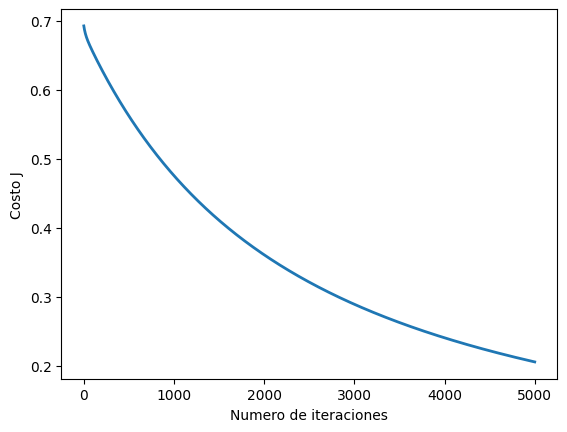

In [81]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(4100)
theta, J_history = descensoGradiente(theta, X_ready, Y1_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

**Prueba**

In [85]:
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

X_test_norm

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,Codigo de Foto,Tipe image,"Natural (si = 1 , no = 0)"
7428,1.575961,1.603700,1.618137,1.576633,1.579427,1.559504,1.538927,1.576864,1.554912,1.530851,...,-0.674475,-0.175328,-0.485831,-0.759451,-0.699853,0.020451,-0.293379,0.277004,0.277004,0.699915
8119,1.377014,1.349986,1.361132,1.334243,1.324519,1.344152,1.323590,1.292460,1.295953,1.286179,...,-0.277839,-0.710653,-0.841795,-0.896228,-0.837049,-0.842324,-0.859089,0.277004,0.277004,0.699915
21135,0.837016,0.856653,0.889956,0.892237,0.857187,0.870377,0.878559,0.908514,0.878741,0.897583,...,0.463698,-0.382550,-0.434979,-0.417508,-0.425460,-0.385561,-0.464806,0.277004,0.277004,0.699915
7743,1.192278,1.082176,1.032736,0.992045,0.984641,0.942161,0.878559,0.922734,0.921901,0.883190,...,-0.829680,-0.866070,-0.875697,-0.178147,-0.648404,-1.028413,-0.241951,0.277004,0.277004,0.699915
8972,0.240176,0.208272,0.176052,0.207841,0.191594,0.181249,0.175123,0.211724,0.130638,-0.009142,...,0.360227,0.463608,0.497307,0.180893,0.157623,0.189623,0.203760,0.277004,0.277004,0.699915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4847,0.481754,0.490177,0.475891,0.478748,0.446502,0.439672,0.462240,0.453467,0.461530,0.451417,...,-1.088356,-0.900607,-0.519733,-0.520090,-0.579806,-0.419395,-0.430521,-0.313787,-0.313787,0.699915
3930,-1.621396,-1.624107,-1.580151,-1.602958,-1.748541,-1.584641,-1.533220,-1.622684,-1.408729,-1.577921,...,-1.122846,-1.021487,-1.129957,-1.306560,-1.282936,-1.214502,-1.321942,-0.904579,-0.904579,0.699915
13340,-1.664027,-1.638203,-1.280312,0.150808,-0.474000,-0.479165,-0.140705,0.012641,-0.804491,-0.354561,...,0.411962,0.498145,0.378653,0.454448,0.414865,0.375712,0.340901,1.458587,1.458587,-1.428745
20166,0.424912,0.391510,0.390223,0.378940,0.347371,0.353531,0.333037,0.297045,0.303277,0.278707,...,-0.070899,-0.037180,0.039639,-0.007176,0.174772,0.088120,-0.001953,-0.313787,-0.313787,0.699915


Concatenamos unos

In [86]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print(X_test_ready)

[[ 1.          1.57596072  1.6036996  ...  0.27700421  0.27700421
   0.69991516]
 [ 1.          1.37701409  1.34998551 ...  0.27700421  0.27700421
   0.69991516]
 [ 1.          0.83701611  0.85665257 ...  0.27700421  0.27700421
   0.69991516]
 ...
 [ 1.         -1.66402717 -1.63820258 ...  1.45858713  1.45858713
  -1.4287446 ]
 [ 1.          0.42491239  0.39151009 ... -0.31378725 -0.31378725
   0.69991516]
 [ 1.         -1.8629738  -1.82144053 ...  1.45858713  1.45858713
  -1.4287446 ]]


In [87]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta)))


y_predicha = np.array(y_predicha)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

In [88]:
y_predicha

array([0.13799161, 0.15052882, 0.18093599, ..., 0.12709573, 0.16788148,
       0.08715104])

In [97]:
print(y_umbral)

y_umbral.shape

[0 0 0 ... 0 0 0]


(5614,)

In [103]:
Y1_test = Y1_test.ravel()
print(Y1_test)

Y1_test.shape

[0 0 0 ... 0 0 0]


(5614,)

In [104]:
# Crear un DataFrame
df_resultados = pd.DataFrame({'y_test': Y1_test, 'prediccion': y_umbral})

# Mostrar el DataFrame
print(df_resultados)

      y_test  prediccion
0          0           0
1          0           0
2          0           0
3          0           0
4          0           0
...      ...         ...
5609       0           0
5610       0           0
5611       0           0
5612       0           0
5613       0           0

[5614 rows x 2 columns]


In [105]:
# Calcular la precisión manualmente
def calcular_precision(y_real, y_pred):
    # Contar el número de predicciones correctas
    correctas = sum(y_real == y_pred)
    # Calcular la precisión como el porcentaje de predicciones correctas
    precision = correctas / len(y_real)
    return precision * 100

# Llamar a la función con los valores de prueba y las predicciones
precision = calcular_precision(Y1_test, y_umbral)

# Imprimir el resultado como porcentaje
print("La precisión del modelo es: {:.2f}%".format(precision))

La precisión del modelo es: 99.96%


Grafica de Presición

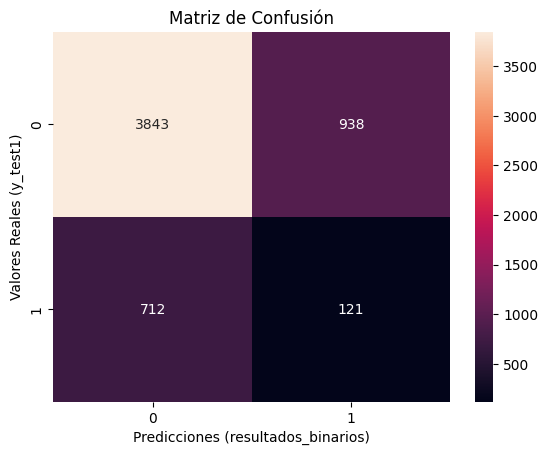

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(Y1_test, y_umbral)

# Visualizar la matriz
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones (resultados_binarios)')
plt.ylabel('Valores Reales (y_test1)')
plt.title('Matriz de Confusión')
plt.show()

### Modelo y prueba para Y2_train,  y = 1 true

In [83]:
Y2_train = Y2_train.to_numpy().ravel()

theta calculado por el descenso por el gradiente: [-0.91672887 -0.01343749 -0.00696771 ... -0.26608017 -0.26608017
  0.34562367]


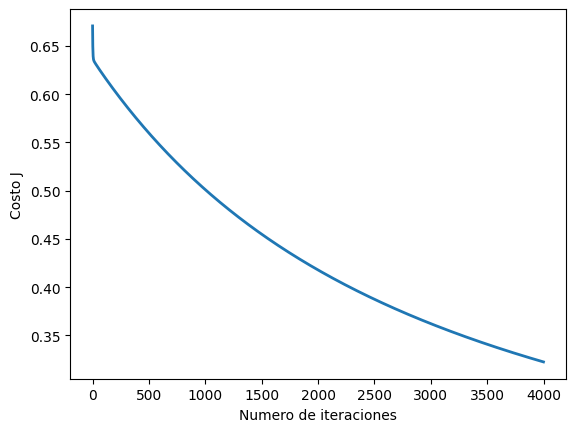

In [84]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta1 = np.zeros(4100)
theta1, J_history = descensoGradiente(theta1, X_ready, Y2_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta1)))

**Prueba**

In [124]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha1 = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha1.append(sigmoid(np.dot(i, theta1)))


y_predicha1 = np.array(y_predicha)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral1 = (y_predicha >= 0.5).astype(int)

In [125]:
y_predicha1

array([0.24617398, 0.16635415, 0.14043576, ..., 0.11598648, 0.30331002,
       0.60669697])

In [126]:
print(y_umbral1)

y_umbral1.shape

[0 0 0 ... 0 0 1]


(5614,)

In [136]:
# Convierte Y2_test a un array de NumPy primero
Y2_test_array = Y2_test.to_numpy().ravel()  # O usa .flatten()

print(Y2_test_array)
print(Y2_test_array.shape)

[0 0 0 ... 0 0 0]
(5614,)


In [138]:
# Crear un DataFrame
df_resultados1 = pd.DataFrame({'y_test': Y2_test_array, 'prediccion': y_umbral1})

# Mostrar el DataFrame
print(df_resultados1)

      y_test  prediccion
0          0           0
1          0           0
2          0           0
3          0           0
4          0           0
...      ...         ...
5609       0           0
5610       1           1
5611       0           0
5612       0           0
5613       0           1

[5614 rows x 2 columns]


In [141]:
# Calcular la precisión manualmente
def calcular_precision(y_real, y_pred):
    # Contar el número de predicciones correctas
    correctas = sum(y_real == y_pred)
    # Calcular la precisión como el porcentaje de predicciones correctas
    precision = correctas / len(y_real)
    return precision * 100

# Llamar a la función con los valores de prueba y las predicciones
precision = calcular_precision(Y2_test_array, y_umbral1)

# Imprimir el resultado como porcentaje
print("La precisión del modelo es: {:.2f}%".format(precision))

La precisión del modelo es: 93.28%


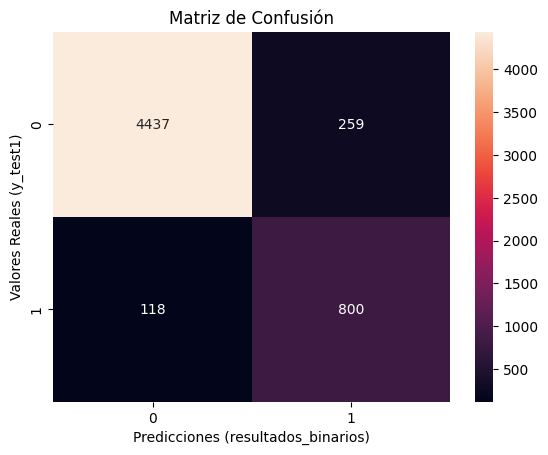

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(Y2_test, y_umbral1)

# Visualizar la matriz
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones (resultados_binarios)')
plt.ylabel('Valores Reales (y_test1)')
plt.title('Matriz de Confusión')
plt.show()

### Modelo y prueba para Y3_train,  y = 2 true

In [142]:
Y3_train = Y3_train.to_numpy().ravel()

theta calculado por el descenso por el gradiente: [-0.71383268  0.00930912  0.00737757 ... -0.10258185 -0.10258185
  0.23891284]


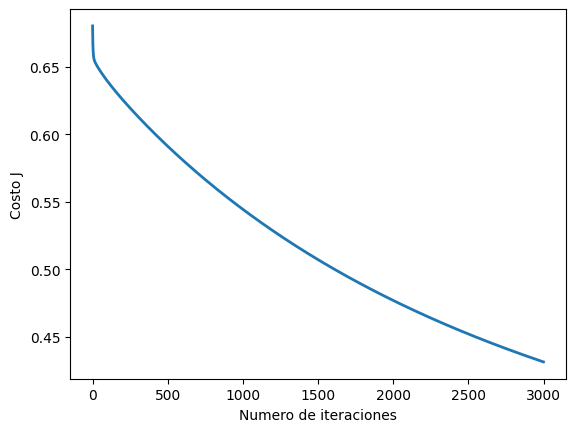

In [144]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 3000

# inicializa theta y ejecuta el descenso por el gradiente
theta2 = np.zeros(4100)
theta2, J_history = descensoGradiente(theta2, X_ready, Y3_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta2)))

**Prueba**

In [145]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha2 = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha2.append(sigmoid(np.dot(i, theta2)))


y_predicha2 = np.array(y_predicha2)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral2 = (y_predicha2 >= 0.5).astype(int)

In [146]:
y_predicha2

array([0.21732568, 0.39690399, 0.36758   , ..., 0.31651348, 0.48083896,
       0.09148594])

In [147]:
print(y_umbral2)

y_umbral2.shape

[0 0 0 ... 0 0 0]


(5614,)

In [148]:
# Convierte Y2_test a un array de NumPy primero
Y3_test_array = Y3_test.to_numpy().ravel()  # O usa .flatten()

print(Y3_test_array)
print(Y3_test_array.shape)

[0 0 0 ... 0 1 0]
(5614,)


In [149]:
# Crear un DataFrame
df_resultados2 = pd.DataFrame({'y_test': Y3_test_array, 'prediccion': y_umbral2})

# Mostrar el DataFrame
print(df_resultados2)

      y_test  prediccion
0          0           0
1          0           0
2          0           0
3          0           0
4          0           0
...      ...         ...
5609       1           0
5610       0           0
5611       0           0
5612       1           0
5613       0           0

[5614 rows x 2 columns]


In [150]:
# Calcular la precisión manualmente
def calcular_precision(y_real, y_pred):
    # Contar el número de predicciones correctas
    correctas = sum(y_real == y_pred)
    # Calcular la precisión como el porcentaje de predicciones correctas
    precision = correctas / len(y_real)
    return precision * 100

# Llamar a la función con los valores de prueba y las predicciones
precision = calcular_precision(Y3_test_array, y_umbral2)

# Imprimir el resultado como porcentaje
print("La precisión del modelo es: {:.2f}%".format(precision))

La precisión del modelo es: 84.86%


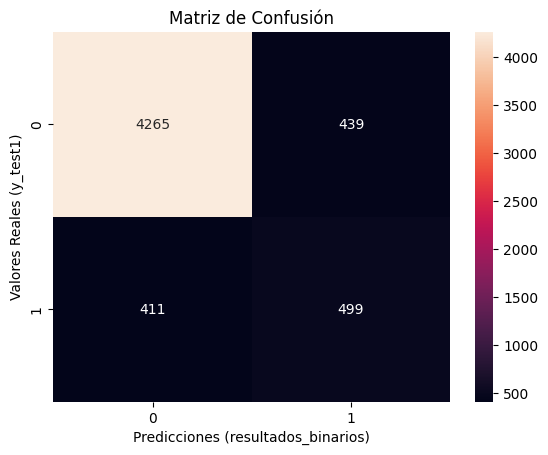

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(Y3_test, y_umbral2)

# Visualizar la matriz
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones (resultados_binarios)')
plt.ylabel('Valores Reales (y_test1)')
plt.title('Matriz de Confusión')
plt.show()

### Modelo y prueba para Y4_train,  y = 3 true

In [151]:
Y4_train = Y4_train.to_numpy().ravel()

theta calculado por el descenso por el gradiente: [-0.7099639   0.00824312  0.00422137 ...  0.08729804  0.08729804
  0.22903703]


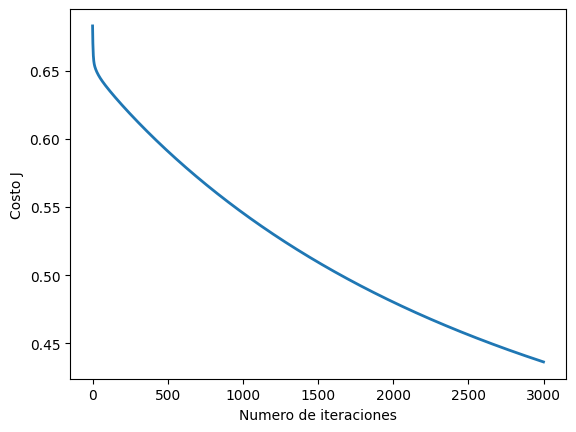

In [152]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 3000

# inicializa theta y ejecuta el descenso por el gradiente
theta3 = np.zeros(4100)
theta3, J_history = descensoGradiente(theta3, X_ready, Y4_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta3)))

**Prueba**

In [153]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha3 = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha3.append(sigmoid(np.dot(i, theta3)))


y_predicha3 = np.array(y_predicha3)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral3 = (y_predicha3 >= 0.5).astype(int)

In [154]:
y_predicha3

array([0.78593048, 0.70872657, 0.60887377, ..., 0.12739682, 0.40051305,
       0.15223198])

In [155]:
print(y_umbral3)

y_umbral3.shape

[1 1 1 ... 0 0 0]


(5614,)

In [156]:
# Convierte Y2_test a un array de NumPy primero
Y4_test_array = Y4_test.to_numpy().ravel()  # O usa .flatten()

print(Y4_test_array)
print(Y4_test_array.shape)

[1 1 1 ... 0 0 0]
(5614,)


In [157]:
# Crear un DataFrame
df_resultados3 = pd.DataFrame({'y_test': Y4_test_array, 'prediccion': y_umbral3})

# Mostrar el DataFrame
print(df_resultados3)

      y_test  prediccion
0          1           1
1          1           1
2          1           1
3          1           1
4          1           0
...      ...         ...
5609       0           1
5610       0           0
5611       0           0
5612       0           0
5613       0           0

[5614 rows x 2 columns]


In [158]:
# Calcular la precisión manualmente
def calcular_precision(y_real, y_pred):
    # Contar el número de predicciones correctas
    correctas = sum(y_real == y_pred)
    # Calcular la precisión como el porcentaje de predicciones correctas
    precision = correctas / len(y_real)
    return precision * 100

# Llamar a la función con los valores de prueba y las predicciones
precision = calcular_precision(Y4_test_array, y_umbral3)

# Imprimir el resultado como porcentaje
print("La precisión del modelo es: {:.2f}%".format(precision))

La precisión del modelo es: 82.74%


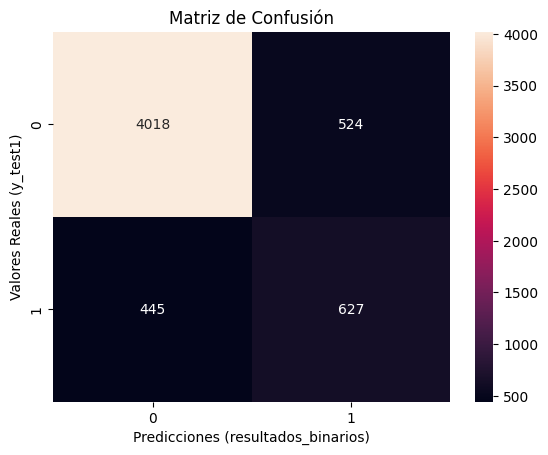

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(Y4_test, y_umbral3)

# Visualizar la matriz
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones (resultados_binarios)')
plt.ylabel('Valores Reales (y_test1)')
plt.title('Matriz de Confusión')
plt.show()

### Modelo y prueba para Y5_train,  y = 4 true

In [159]:
Y5_train = Y5_train.to_numpy().ravel()

theta calculado por el descenso por el gradiente: [-0.73905283  0.00374194  0.00140615 ...  0.24140023  0.24140023
  0.21480331]


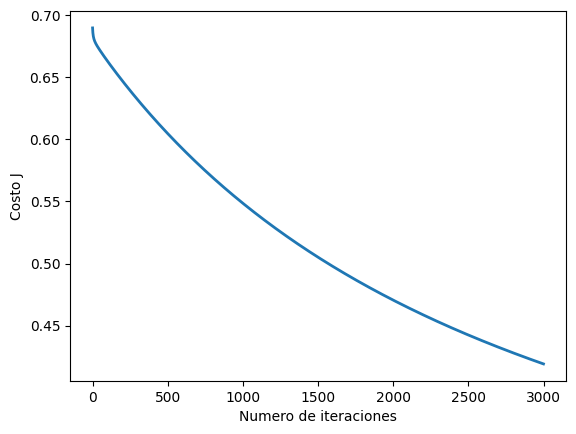

In [160]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 3000

# inicializa theta y ejecuta el descenso por el gradiente
theta4 = np.zeros(4100)
theta4, J_history = descensoGradiente(theta4, X_ready, Y5_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta4)))

**Prueba**

In [161]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha4 = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha4.append(sigmoid(np.dot(i, theta4)))


y_predicha4 = np.array(y_predicha4)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral4 = (y_predicha4 >= 0.5).astype(int)

In [162]:
y_predicha4

array([0.28351242, 0.32792961, 0.43433492, ..., 0.2706076 , 0.39719807,
       0.28368802])

In [163]:
print(y_umbral4)

y_umbral4.shape

[0 0 0 ... 0 0 0]


(5614,)

In [164]:
# Convierte Y2_test a un array de NumPy primero
Y5_test_array = Y5_test.to_numpy().ravel()  # O usa .flatten()

print(Y5_test_array)
print(Y5_test_array.shape)

[0 0 0 ... 0 0 0]
(5614,)


In [165]:
# Crear un DataFrame
df_resultados4 = pd.DataFrame({'y_test': Y5_test_array, 'prediccion': y_umbral4})

# Mostrar el DataFrame
print(df_resultados4)

      y_test  prediccion
0          0           0
1          0           0
2          0           0
3          0           1
4          0           0
...      ...         ...
5609       0           0
5610       0           0
5611       0           0
5612       0           0
5613       0           0

[5614 rows x 2 columns]


In [166]:
# Calcular la precisión manualmente
def calcular_precision(y_real, y_pred):
    # Contar el número de predicciones correctas
    correctas = sum(y_real == y_pred)
    # Calcular la precisión como el porcentaje de predicciones correctas
    precision = correctas / len(y_real)
    return precision * 100

# Llamar a la función con los valores de prueba y las predicciones
precision = calcular_precision(Y5_test_array, y_umbral4)

# Imprimir el resultado como porcentaje
print("La precisión del modelo es: {:.2f}%".format(precision))

La precisión del modelo es: 88.01%


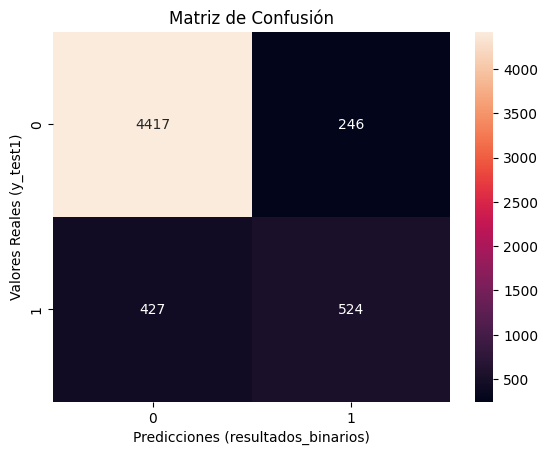

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(Y5_test, y_umbral4)

# Visualizar la matriz
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones (resultados_binarios)')
plt.ylabel('Valores Reales (y_test1)')
plt.title('Matriz de Confusión')
plt.show()

### Modelo y prueba para Y6_train,  y = 5 true

In [168]:
Y6_train = Y6_train.to_numpy().ravel()

theta calculado por el descenso por el gradiente: [-0.70539702 -0.01506005 -0.00591238 ...  0.38074891  0.38074891
 -0.4539949 ]


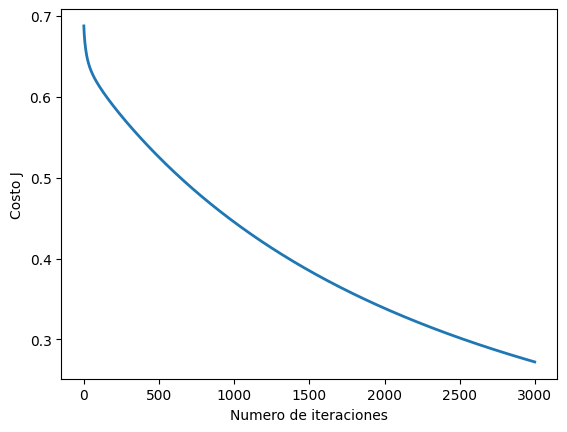

In [169]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 3000

# inicializa theta y ejecuta el descenso por el gradiente
theta5 = np.zeros(4100)
theta5, J_history = descensoGradiente(theta5, X_ready, Y6_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')



# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta5)))

**Prueba**

In [170]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha5 = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha5.append(sigmoid(np.dot(i, theta5)))


y_predicha5 = np.array(y_predicha5)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral5 = (y_predicha5 >= 0.5).astype(int)

In [171]:
y_predicha5

array([0.26141827, 0.1978294 , 0.20665999, ..., 0.95192206, 0.17145532,
       0.86984582])

In [172]:
print(y_umbral5)

y_umbral5.shape

[0 0 0 ... 1 0 1]


(5614,)

In [173]:
# Convierte Y2_test a un array de NumPy primero
Y6_test_array = Y6_test.to_numpy().ravel()  # O usa .flatten()

print(Y6_test_array)
print(Y6_test_array.shape)

[0 0 0 ... 1 0 1]
(5614,)


In [174]:
# Crear un DataFrame
df_resultados5 = pd.DataFrame({'y_test': Y6_test_array, 'prediccion': y_umbral5})

# Mostrar el DataFrame
print(df_resultados5)

      y_test  prediccion
0          0           0
1          0           0
2          0           0
3          0           0
4          0           0
...      ...         ...
5609       0           0
5610       0           0
5611       1           1
5612       0           0
5613       1           1

[5614 rows x 2 columns]


In [175]:
# Calcular la precisión manualmente
def calcular_precision(y_real, y_pred):
    # Contar el número de predicciones correctas
    correctas = sum(y_real == y_pred)
    # Calcular la precisión como el porcentaje de predicciones correctas
    precision = correctas / len(y_real)
    return precision * 100

# Llamar a la función con los valores de prueba y las predicciones
precision = calcular_precision(Y6_test_array, y_umbral5)

# Imprimir el resultado como porcentaje
print("La precisión del modelo es: {:.2f}%".format(precision))

La precisión del modelo es: 97.70%


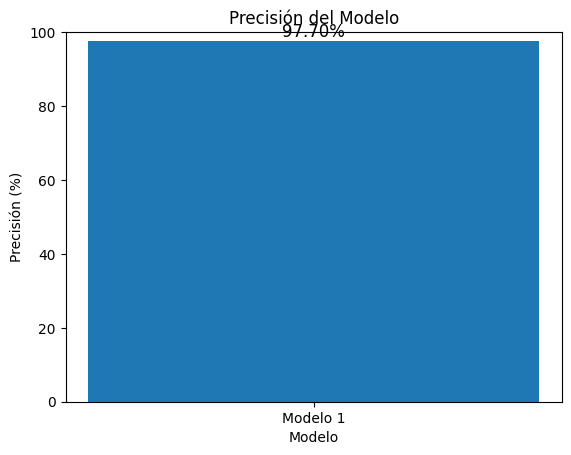

In [185]:
import matplotlib.pyplot as plt

# Datos de precisión (en este caso, solo tienes un valor de precisión)
modelos = ['Modelo 1']  # Puedes agregar más nombres de modelos si tienes varios
precisiones = [precision]  # Aquí usarías los valores de precisión calculados

# Crear la gráfica de barras
plt.bar(modelos, precisiones)

# Añadir título y etiquetas
plt.title('Precisión del Modelo')
plt.xlabel('Modelo')
plt.ylabel('Precisión (%)')

# Mostrar los valores de precisión encima de las barras
for i, v in enumerate(precisiones):
    plt.text(i, v + 1, "{:.2f}%".format(v), ha='center', fontsize=12)

# Mostrar la gráfica
plt.ylim([0, 100])  # Establecer límite del eje y para mostrar hasta 100%
plt.show()

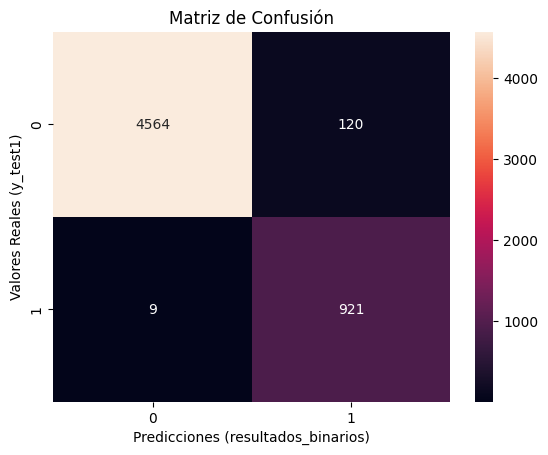

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(Y6_test, y_umbral5)

# Visualizar la matriz
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicciones (resultados_binarios)')
plt.ylabel('Valores Reales (y_test1)')
plt.title('Matriz de Confusión')
plt.show()

## 9. **ENUNCIADO 6**

Entrenando el Modelo con One vs All

In [191]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    # Añade epsilon para evitar el logaritmo de 0
    epsilon = 1e-5
    h = np.clip(h, epsilon, 1 - epsilon)

    temp = theta.copy()  # Usa una copia de theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad


In [223]:
def oneVsAll(X, y, num_labels, lambda_, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    cost_history = []  # Para almacenar el costo durante el entrenamiento de todas las clases

    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        cost_history_c = []  # Costo por clase

        # Función callback para registrar el costo en cada iteración
        def cost_callback(theta):
            J, _ = lrCostFunction(theta, X, (y == c).astype(int), lambda_)
            cost_history_c.append(J)

        # Optimización con devolución de llamada para registrar el costo
        options = {'maxiter': num_iters}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                args=(X, (y == c).astype(int), lambda_),
                                jac=True,
                                method='CG',
                                callback=cost_callback,
                                options=options)

        all_theta[c] = res.x
        cost_history.append(cost_history_c)

    return all_theta, cost_history # Removed the extra indentation

In [195]:
y_train_array = y_train.to_numpy().ravel()

In [243]:
# Definir el parámetro de regularización lambda
num_labels = 6
lambda_ = 0.1
num_iters = 200  # Número de iteraciones

# Aplicar el enfoque de uno contra todos para entrenar el clasificador
# La función oneVsAll entrenará un clasificador para cada clase en el conjunto de datos
# y devolverá los parámetros theta (pesos) correspondientes a cada clase
all_theta, cost_history = oneVsAll(X_train_norm, y_train_array, num_labels, lambda_, num_iters)

In [244]:
all_theta

array([[-9.64055205e+00,  1.06933667e-01,  1.28308044e-02, ...,
        -3.18768983e+00, -3.18768983e+00, -6.09685601e+00],
       [-7.13142641e+00, -2.66715563e-01, -5.23874273e-02, ...,
        -2.62387184e+00, -2.62387184e+00,  4.33296530e+00],
       [-5.54902128e+00,  2.00420490e-01,  6.93046981e-02, ...,
        -1.52139140e+00, -1.52139140e+00,  4.17220912e+00],
       [-3.62481882e+00,  1.00205794e-01,  2.32500422e-02, ...,
         4.10357187e-01,  4.10357187e-01,  2.26850048e+00],
       [-7.94889199e+00, -1.01271277e-02, -2.72180765e-02, ...,
         3.70748249e+00,  3.70748249e+00,  5.16949376e+00],
       [-9.89231285e+00, -8.41479749e-02,  2.32524599e-03, ...,
         3.18459391e+00,  3.18459391e+00, -6.33980010e+00]])

Graficando los costos

In [250]:
def plot_cost_history(cost_history_all_classes):
    plt.figure(figsize=(10, 6))

    for i, cost_history in enumerate(cost_history_all_classes):
        plt.plot(range(len(cost_history)), cost_history, label=f'Clase {i}')

    plt.xlabel('Iteraciones')
    plt.ylabel('Costo J')
    plt.title('Evolución del costo por clase durante el entrenamiento (One-vs-All)')
    plt.legend()
    plt.grid(True)
    plt.show()

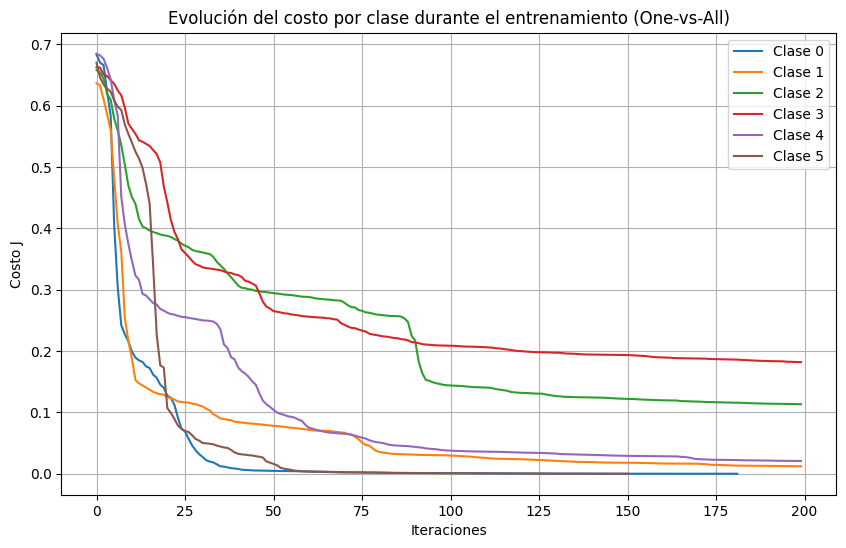

In [251]:
plot_cost_history(cost_history)

In [246]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [247]:
y_test_array = y_test.to_numpy().ravel()

In [248]:
print(X_test_norm.shape)
pred = predictOneVsAll(all_theta, X_test_norm)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y_test_array) * 100))

(5614, 4099)
Precision del conjuto de entrenamiento: 92.93%


Grafica de Prueba

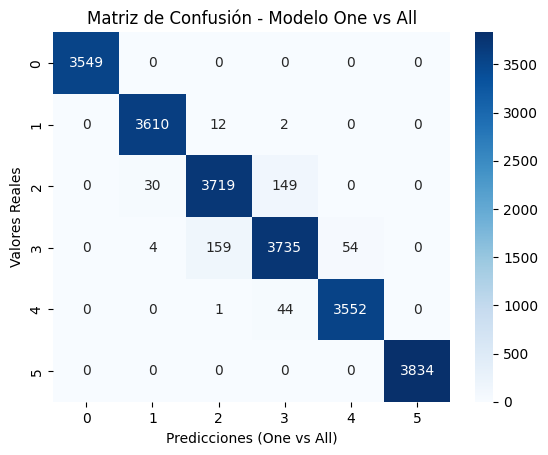

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular las predicciones del modelo One vs All
pred = predictOneVsAll(all_theta, X_train_norm)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train_array, pred)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Añadir etiquetas a los ejes y un título
plt.xlabel('Predicciones (One vs All)')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - Modelo One vs All')
plt.show()